In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np

In [2]:
wp = 0.2
ws = 0.3
gpass = 1
gstop = 40


In [3]:
system = signal.iirdesign(wp, ws, gpass, gstop)
w, h = signal.freqz(*system)


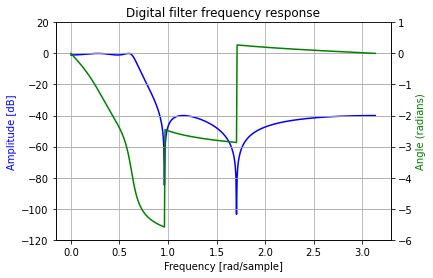

In [4]:
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.grid(True)
ax1.set_ylim([-120, 20])
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
ax2.set_ylim([-6, 1])
nticks = 8
ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))


In [5]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from splane import plot_plantilla

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

###
## Señal de ECG registrada a 1 kHz, con contaminación de diversos orígenes.
###

# para listar las variables que hay en el archivo
#io.whosmat('ecg.mat')
mat_struct = sio.loadmat('ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)

fs = 1000 # Hz
nyq_frec = fs / 2

In [6]:
# Plantilla

# filter design
ripple = 0.5 # dB
atenuacion = 40 # dB

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)

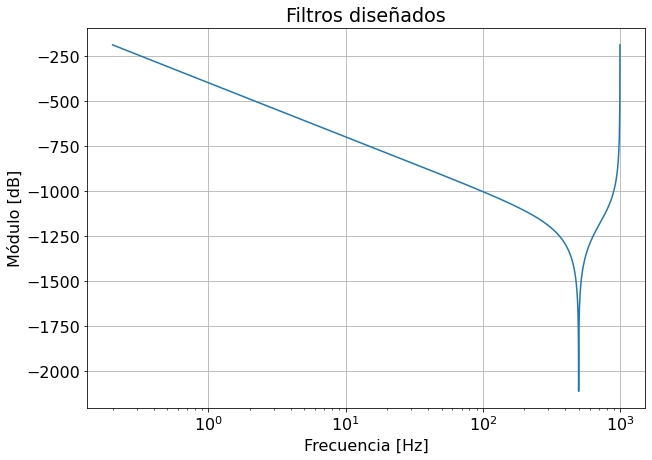

In [10]:
gpass = ripple
gstop = atenuacion
wp = np.array([wp1,     wp2])
ws = np.array([ws1,     ws2])

bp_sos_butter = sig.iirdesign(([wp1/nyq_frec,     wp2/nyq_frec]), ([ws1/nyq_frec,     ws2/nyq_frec]), gpass, gstop, analog=False, ftype='butter', output='sos', fs=fs)
#bp_sos_cheby = ...
#bp_sos_cauer = ...
#bp_sos_OTROS = ...

w, hh_win = sig.sosfreqz(bp_sos_butter,  worN=5000, whole=True,fs=fs)


plt.semilogx(w, 20 * np.log10(np.abs(hh_win)))

plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
#plt.axis([0, 100, -60, 5 ]);

